In [1]:
import numpy as np
import sympy as sp
import scipy.constants as scc
import matplotlib.pyplot as plt
from sympy import init_printing
from IPython.display import display
init_printing()

In [2]:
g_s = 2
mu_b = scc.e*scc.hbar/(2*scc.m_e)

In [3]:
# 4_12_a

In [4]:
t, epsilon, U = sp.symbols('t, epsilon, U')

In [5]:
H = sp.Matrix([[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, -t, -t], [0, 0, 0, 0, t, t], [0, 0, -t, t, U + epsilon, 0], [0, 0, -t, t, 0, U - epsilon]])
H

⎡0  0  0   0    0      0  ⎤
⎢                         ⎥
⎢0  0  0   0    0      0  ⎥
⎢                         ⎥
⎢0  0  0   0   -t     -t  ⎥
⎢                         ⎥
⎢0  0  0   0    t      t  ⎥
⎢                         ⎥
⎢0  0  -t  t  U + ε    0  ⎥
⎢                         ⎥
⎣0  0  -t  t    0    U - ε⎦

In [6]:
eigenvals = list(H.eigenvals().keys())

In [7]:
epsilon_range = np.linspace(-200e-06, 200e-06, 100)#*1e06
U_range = np.array([7, 7, 70, 70])*1e-06#*1e06
t_range = np.array([1, 10, 1, 10])*1e-06#*1e06

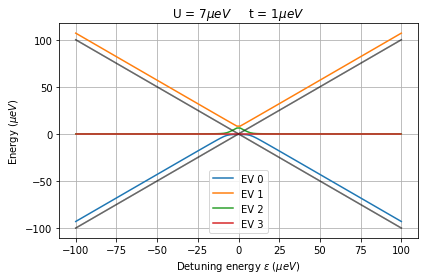

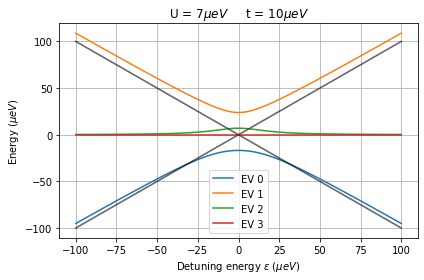

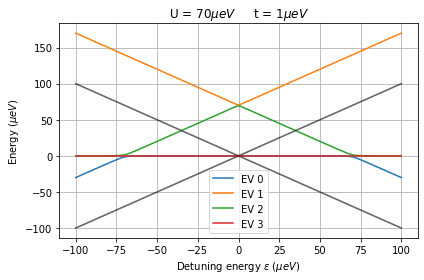

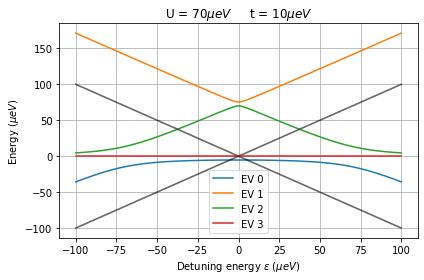

In [30]:
for i in range(len(U_range)):
    for j in range(len(eigenvals)):
        eigenval = eigenvals[j]
        eigenval = eigenval.subs([(U, U_range[i]), (t, t_range[i])])
        eigenval = [sp.re(eigenval.subs(epsilon, epsilon_value).evalf()) for epsilon_value in epsilon_range]
        plt.plot(epsilon_range*1e06, np.array(eigenval)*1e06, label = f'EV {j}')
        plt.plot(epsilon_range*1e06, epsilon_range*1e06, color='black', alpha=0.2)
        plt.plot(epsilon_range*1e06, -epsilon_range*1e06, color='black', alpha=0.2)
        
    plt.title(f"U = {round(U_range[i]*1e06)}"+r"$\mu eV$"+f"     t = {round(t_range[i]*1e06)}"+r"$\mu eV$")
    plt.grid()
    plt.xlabel(r'Detuning energy $\epsilon$ $(\mu eV)$')
    plt.ylabel(r'Energy $(\mu eV)$')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f'CoMa_4_12_a_{i}.pdf')
    plt.show()

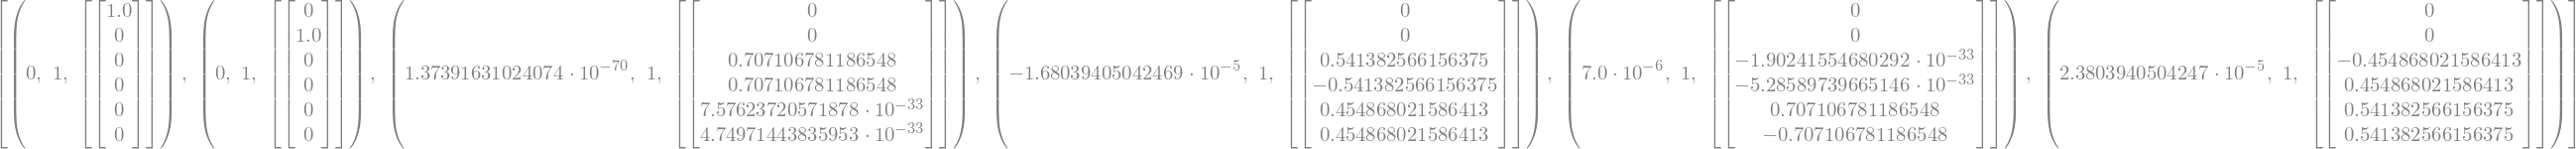

In [51]:
# lowest eigenenergy eigenvects
H.subs([(U, U_range[1]), (t, t_range[1]), (epsilon, 0)]).eigenvects()

In [63]:
# 4_12_b
# The lowest eigenstate is state 2

In [87]:
for eigenvalue in eigenvals:
    display(eigenvalue.subs([(epsilon, 0), (t, t_range[1]), (U, U_range[1])]).evalf(chop=True))

In [14]:
# 4_12_c
# A homogenous B-field creates a Zeeman-like splitting and therefore
# an additional spin-splitting

In [15]:
B_norm = sp.symbols('B_norm')
H_B = B_norm * sp.Matrix([[1, 0, 0, 0, 0, 0], [0, -1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
H_B

⎡Bₙₒᵣₘ    0     0  0  0  0⎤
⎢                         ⎥
⎢  0    -Bₙₒᵣₘ  0  0  0  0⎥
⎢                         ⎥
⎢  0      0     0  0  0  0⎥
⎢                         ⎥
⎢  0      0     0  0  0  0⎥
⎢                         ⎥
⎢  0      0     0  0  0  0⎥
⎢                         ⎥
⎣  0      0     0  0  0  0⎦

In [16]:
H_new = H + H_B
H_new

⎡Bₙₒᵣₘ    0     0   0    0      0  ⎤
⎢                                  ⎥
⎢  0    -Bₙₒᵣₘ  0   0    0      0  ⎥
⎢                                  ⎥
⎢  0      0     0   0   -t     -t  ⎥
⎢                                  ⎥
⎢  0      0     0   0    t      t  ⎥
⎢                                  ⎥
⎢  0      0     -t  t  U + ε    0  ⎥
⎢                                  ⎥
⎣  0      0     -t  t    0    U - ε⎦

In [17]:
eigenvals_new = list(H_new.eigenvals().keys())

In [18]:
display(eigenvals_new[0])
display(eigenvals_new[1])

In [19]:
epsilon_range = np.linspace(-100, 100, 100)*1e-06
t_new = 7e-06
U_new = 70e-06
B_range = np.array([0, 200, 500, 1000])*1e-03
B_norm_range = B_range * scc.hbar/(mu_b * g_s) *1e06
B_norm_range

array([0.00000000e+00, 1.13712602e-06, 2.84281505e-06, 5.68563010e-06])

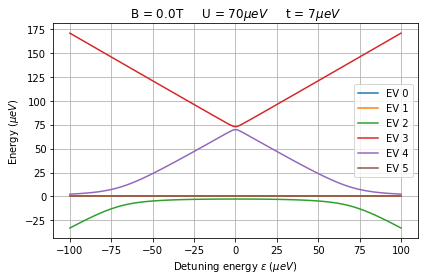

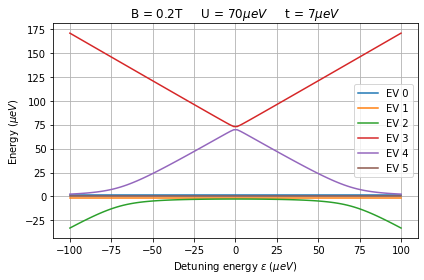

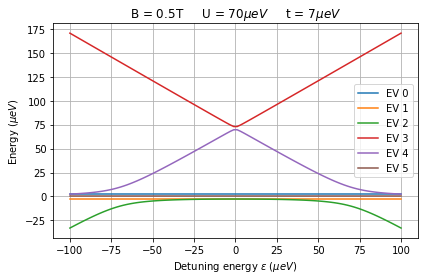

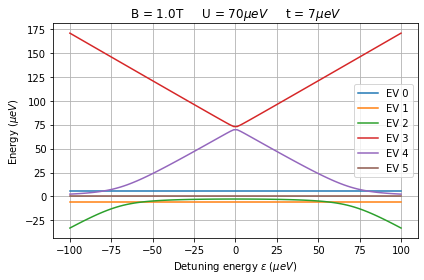

In [31]:
for i in range(len(B_norm_range)):
    for j in range(len(eigenvals_new)):
        eigenval = eigenvals_new[j]
        eigenval = eigenval.subs([(U, U_new), (t, t_new), (B_norm, B_norm_range[i])])
        eigenval = [sp.re(eigenval.subs(epsilon, epsilon_value).evalf()) for epsilon_value in epsilon_range]
        plt.plot(epsilon_range*1e06, np.array(eigenval)*1e06, label = f'EV {j}')
        #plt.plot(epsilon_range*1e06, epsilon_range*1e06, color='black')
        #plt.plot(epsilon_range*1e06, -epsilon_range*1e06, color='black')
        
    plt.title(f"B = {B_range[i]}T     U = {round(U_new*1e06)}"+r"$\mu eV$"+f"     t = {round(t_new*1e06)}"+r"$\mu eV$")
    plt.grid()
    plt.xlabel(r'Detuning energy $\epsilon$ $(\mu eV)$')
    plt.ylabel(r'Energy $(\mu eV)$')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f'CoMa_4_12_d_{i}.pdf')
    plt.show()

In [34]:
# EV2 eigenenergy eigenvects for B = 1T
H_new.subs([(B_norm, B_norm_range[3]), (U, U_new), (t, t_new), (epsilon, 50e-06)]).eigenvects()

⎡⎛                        ⎡⎡1.0⎤⎤⎞  ⎛                         ⎡⎡ 0 ⎤⎤⎞  ⎛     
⎢⎜                        ⎢⎢   ⎥⎥⎟  ⎜                         ⎢⎢   ⎥⎥⎟  ⎜     
⎢⎜                        ⎢⎢ 0 ⎥⎥⎟  ⎜                         ⎢⎢1.0⎥⎥⎟  ⎜     
⎢⎜                        ⎢⎢   ⎥⎥⎟  ⎜                         ⎢⎢   ⎥⎥⎟  ⎜     
⎢⎜                        ⎢⎢ 0 ⎥⎥⎟  ⎜                         ⎢⎢ 0 ⎥⎥⎟  ⎜     
⎢⎜5.68563010356572e-6, 1, ⎢⎢   ⎥⎥⎟, ⎜-5.68563010356572e-6, 1, ⎢⎢   ⎥⎥⎟, ⎜-1.28
⎢⎜                        ⎢⎢ 0 ⎥⎥⎟  ⎜                         ⎢⎢ 0 ⎥⎥⎟  ⎜     
⎢⎜                        ⎢⎢   ⎥⎥⎟  ⎜                         ⎢⎢   ⎥⎥⎟  ⎜     
⎢⎜                        ⎢⎢ 0 ⎥⎥⎟  ⎜                         ⎢⎢ 0 ⎥⎥⎟  ⎜     
⎢⎜                        ⎢⎢   ⎥⎥⎟  ⎜                         ⎢⎢   ⎥⎥⎟  ⎜     
⎣⎝                        ⎣⎣ 0 ⎦⎦⎠  ⎝                         ⎣⎣ 0 ⎦⎦⎠  ⎝     

                     ⎡⎡         0          ⎤⎤⎞  ⎛                         ⎡⎡  
                     ⎢⎢                    ⎥⎥⎟  ⎜  